# Exercises of the eighth week

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigendecomposition:

-Eigenvalues:
1: 26.488401459845193
2: 1.9073083816103058
3: -2.750247248958343e-16

-Eigenvectors:
1: [-0.11686195 -0.57560821 -0.80933212]
2: [ 0.56539952 -0.7085256   0.42227344]
3: [-0.81649658 -0.40824829  0.40824829]

Single Value Decomposition:

-Eigenvalues:
1: 26.4884014598452
2: 1.9073083816103038
3: 2.694905724917489e-16

-Eigenvectors:
1: [-0.11686195 -0.57560821 -0.80933212]
2: [ 0.56539952 -0.7085256   0.42227344]
3: [-0.81649658 -0.40824829  0.40824829]

Are the eigenvectors calculated with the methods coincident?  True 

Diagonalised covariance matrix:
 [[ 2.64884015e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.90730838e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.75024725e-16]] 

Comparison between traces of non-diagonal/diagonal covariant matrices:
 28.395709841455503 28.3957098414555

Percentage of total variability retained considering the first k components:
 k = 3: 100.0%
 k = 2: 100.0%
 k = 1: 93.28311075067478%
Ther

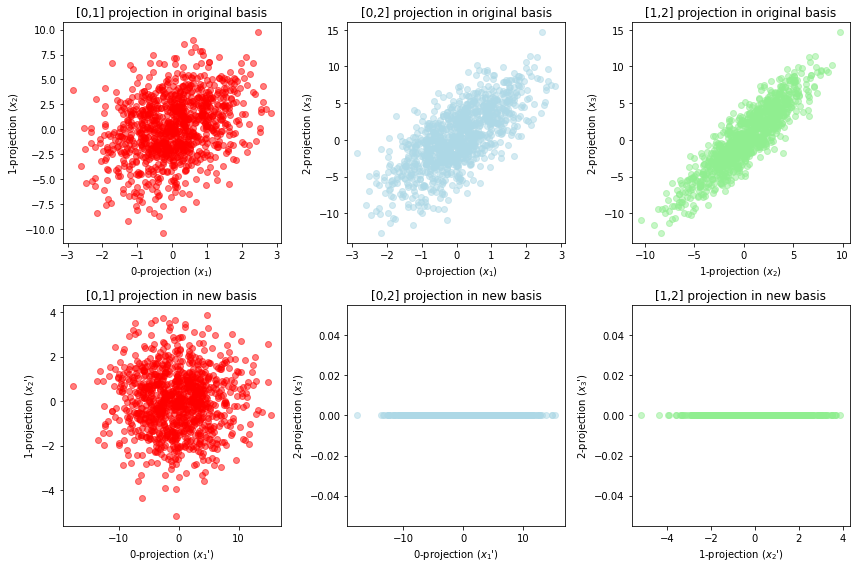

In [2]:
# Generate the 3 variable samples
x1 = np.random.normal(loc=0, scale=1, size=1000)
x2 = x1 + np.random.normal(loc=0, scale=3, size=1000)
x3 = (2*x1) + x2

# Generate covariance matrix from the three samples
xar = np.array([x1,x2,x3])
covm = np.cov(xar)

# Diagonalise covariance matrix using the eigendecomposition method obtaining eigenvalues and the diagonalising matrix to get the eigenvectors (columns)
print("Eigendecomposition:\n")
l,V = la.eig(covm)

# Reordering eigenvalues (and corresponding eigenvectors) in decreasing order
orderl = l.argsort()[::-1]    # gets the id of the eigenvalues in decreasing order
l = np.real_if_close(l)[orderl]    # sort eigenvalues (and converting them to real float numbers since after the diagonalisations they were complex numbers having 0 imaginary component)
V = V[:, orderl]    # sort eigenvectors

# Output Eigenvalues and Eigenvectors
print("-Eigenvalues:")
for i in range(3):
    print(str(i+1) + ": " + str(l[i]))
print("\n-Eigenvectors:")
for i in range(3):
    print(str(i+1) + ": " + str(V[:,i]))

# Diagonalise the covariance matrix using the Single Value Decomposition Method
print("\nSingle Value Decomposition:\n")
U, s, Vt = la.svd(covm)

# Sort once again eigenvalues and eigenvectors
orders = s.argsort()[::-1]
s = np.real_if_close(s)[orders]
U = U[:, orders]

# Output
print("-Eigenvalues:")
for i in range(3):
    print(str(i+1) + ": " + str(s[i]))
print("\n-Eigenvectors:")
for i in range(3):
    print(str(i+1) + ": " + str(U[:,i]))

# Check if the eigenvalues obtained with the 2 methods are the same
print("\nAre the eigenvectors calculated with the methods coincident? ", np.allclose(V, U), "\n")

# Generate the diagonalised covariance matrix
Lambda = np.diag(l)
print("Diagonalised covariance matrix:\n", Lambda, "\n")
print("Comparison between traces of non-diagonal/diagonal covariant matrices:\n", covm.trace(), Lambda.trace())

# Check of the retained variability keeping k eigenvalues
print("\nPercentage of total variability retained considering the first k components:")
for k in range(len(l)):
    print(" k = " + str(len(l)-k) + ": " + str(100*np.diagonal(Lambda)[0:len(l)-k].sum()/Lambda.trace()) + "%")
print("Therefore I can choose k=2 and reduce the dimensionality of the system still retaining over 99% of the total variability.")
print("The obtained result is consistent with how the datasets were made, since x3 depends on both x1 and x2, but x1 and x2 have basically been generated by two independent gaussian distributions.")

# Since I am discarding the third eigenvalue I set the third eigenvector in the V matrix to (0,0,0) 
V = np.hstack([V[:,:2], np.zeros((3, 1))])
# Rotating the data into the new basis for the plot
xarp = np.dot(V.T, xar)

# Plot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

ax1.scatter(x=x1,y=x2, color="r", alpha=0.5)
ax2.scatter(x=x1,y=x3, color="LightBlue", alpha=0.5)
ax3.scatter(x=x2,y=x3, color="LightGreen",alpha=0.5)
ax4.scatter(x=xarp[0,:], y=xarp[1,:], color="r", alpha=0.5)
ax5.scatter(x=xarp[0,:], y=xarp[2,:], color="LightBlue", alpha=0.5)
ax6.scatter(x=xarp[1,:], y=xarp[2,:], color="LightGreen", alpha=0.5)

ax1.set_title("[0,1] projection in original basis")
ax2.set_title("[0,2] projection in original basis")
ax3.set_title("[1,2] projection in original basis")
ax4.set_title("[0,1] projection in new basis")
ax5.set_title("[0,2] projection in new basis")
ax6.set_title("[1,2] projection in new basis")

ax1.set_xlabel("0-projection ($x_1$)")
ax2.set_xlabel("0-projection ($x_1$)")
ax3.set_xlabel("1-projection ($x_2$)")
ax4.set_xlabel("0-projection ($x_1$')")
ax5.set_xlabel("0-projection ($x_1$')")
ax6.set_xlabel("1-projection ($x_2$')")

ax1.set_ylabel("1-projection ($x_2$)")
ax2.set_ylabel("2-projection ($x_3$)")
ax3.set_ylabel("2-projection ($x_3$)")
ax4.set_ylabel("1-projection ($x_2$')")
ax5.set_ylabel("2-projection ($x_3$')")
ax6.set_ylabel("2-projection ($x_3$')")

fig.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigendecomposition:

-Eigenvalues:
1: 26.48846818476814
2: 1.9073540469153085
3: 0.015232748220953994
4: 0.014227556847966763
5: 0.009418570049767082
6: 0.00786313129475407
7: 0.007306854404566445
8: 0.004832593287412747
9: 0.004178455653417832
10: 0.003534460270045621
11: 0.0030517928312207778
12: 0.0025607400807600247
13: -5.737618548515818e-16

-Eigenvectors:
1: [-1.16861819e-01 -5.75607467e-01 -8.09331106e-01  1.96889545e-04
  4.50143602e-04 -5.15370483e-04 -1.05423838e-04 -9.07933654e-05
 -8.19881896e-04  7.55679475e-04 -4.45378863e-04  2.68348147e-04
 -6.92676890e-04]
2: [-5.65392690e-01  7.08517243e-01 -4.22268138e-01 -3.65322735e-04
 -3.44822450e-03 -2.00909297e-03  1.21766953e-03  1.45928595e-03
 -1.86665947e-03 -4.69559391e-04 -3.94822249e-04  4.72984802e-04
  5.34273033e-04]
3: [ 3.82559304e-04 -9.77920185e-04 -2.12801578e-04  4.58781260e-03
  7.25724757e-02 -1.58804259e-02  3.61346248e-01  1.19467427e-02
 -3.15280090e-02 -8.94218075e-02  1.71498057e-02 -1.26776675e-02
  9.2

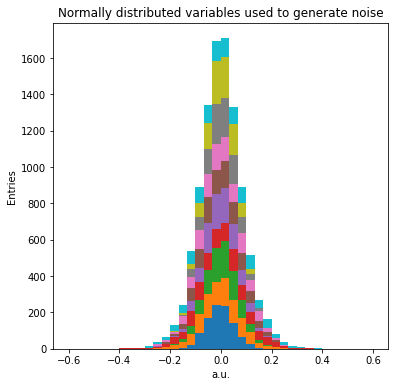

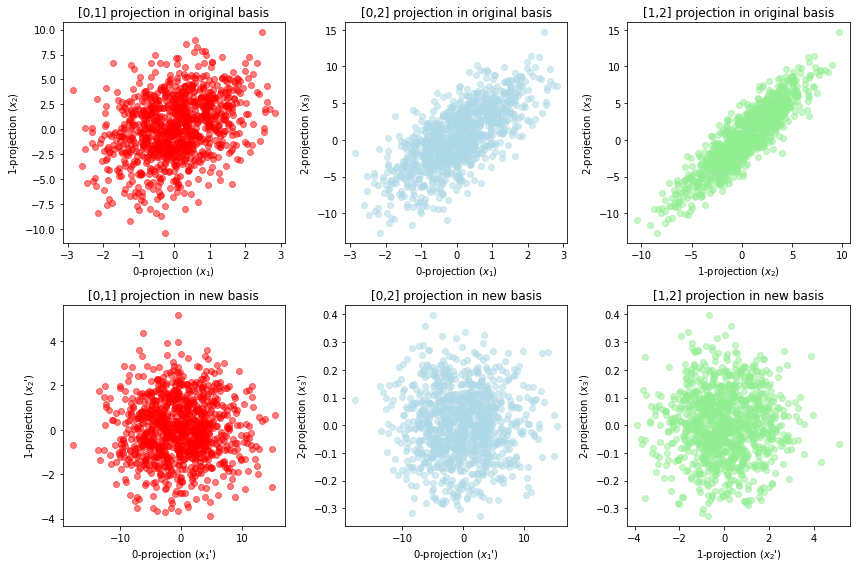

In [3]:
# Generating 10 noise samples

xn = np.zeros((10,1000))    # 10 rows like the requested variables
sstd = (2*np.random.rand(10)+1)/20    # random scales of the noise samples
for i in range(10):
    xn[i] = np.random.normal(loc=0, scale=sstd[i], size=1000)
    
# Plot of the contributions of the generated noise samples
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.hist([xn[i] for i in range(10)], stacked=True, histtype="stepfilled", range=(-0.6, 0.6), bins=36)
ax.set_title("Normally distributed variables used to generate noise")
ax.set_xlabel("a.u.")
ax.set_ylabel("Entries")
    
# reusing xar from last exercise; adding noise samples and calculating the now 13x13 covariance matrix
xarn = np.vstack((xar,xn))
covmn = np.cov(xarn)


# Eigencomposition method
print("Eigendecomposition:\n")
ln,Vn = la.eig(covmn)
orderln = ln.argsort()[::-1]
ln = np.real_if_close(ln)[orderln]
Vn = Vn[:, orderln]

print("-Eigenvalues:")
for i in range(13):
    print(str(i+1) + ": " + str(ln[i]))
print("\n-Eigenvectors:")
for i in range(13):
    print(str(i+1) + ": " + str(Vn[:,i]))

# SVD Method
print("\nSingle Value Decomposition:\n")
Un, sn, Vtn = la.svd(covmn)
ordersn = sn.argsort()[::-1]
sn = np.real_if_close(sn)[ordersn]
Un = Un[:, ordersn]

print("-Eigenvalues:")
for i in range(13):
    print(str(i+1) + ": " + str(sn[i]))
print("\n-Eigenvectors:")
for i in range(13):
    print(str(i+1) + ": " + str(Un[:,i]))

print("\nAre the eigenvectors calculated with the methods coincident? ", np.allclose(abs(Vn), abs(Un)), "\n")

# Same as the previous exercise, generating the diagonal covariance matrix
Lambdan = np.diag(ln)
print("Diagonalised covariance matrix:\n", Lambdan, "\n")
print("Comparison between traces of non-diagonal/diagonal covariant matrices:\n", covmn.trace(), Lambdan.trace())

# Variability
print("\nPercentage of total variability retained considering the first k components:")
for k in range(len(ln)):
    print(" k = " + str(len(ln)-k) + ": " + str(100*np.diagonal(Lambdan)[0:len(ln)-k].sum()/Lambdan.trace()) + "%")
print("Therefore I can choose k=2 and reduce the dimensionality of the system still retaining over 99% of the total variability.")
print("With the addition of the noise the correlation is not as evident as in the previous case, but there still is a relevant correlation between x3 (new basis) and the other two variables (Notice x, y axis scales).")

# Only keeping the first two eigenvalues
V = np.hstack([Vn[:,:2], np.zeros((13, 11))]) 
xarpn = np.dot(Vn.T, xarn)

# Plot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

ax1.scatter(x=x1,y=x2, color="r", alpha=0.5)
ax2.scatter(x=x1,y=x3, color="LightBlue", alpha=0.5)
ax3.scatter(x=x2,y=x3, color="LightGreen",alpha=0.5)
ax4.scatter(x=xarpn[0,:], y=xarpn[1,:], color="r", alpha=0.5)
ax5.scatter(x=xarpn[0,:], y=xarpn[2,:], color="LightBlue", alpha=0.5)
ax6.scatter(x=xarpn[1,:], y=xarpn[2,:], color="LightGreen", alpha=0.5)

ax1.set_title("[0,1] projection in original basis")
ax2.set_title("[0,2] projection in original basis")
ax3.set_title("[1,2] projection in original basis")
ax4.set_title("[0,1] projection in new basis")
ax5.set_title("[0,2] projection in new basis")
ax6.set_title("[1,2] projection in new basis")

ax1.set_xlabel("0-projection ($x_1$)")
ax2.set_xlabel("0-projection ($x_1$)")
ax3.set_xlabel("1-projection ($x_2$)")
ax4.set_xlabel("0-projection ($x_1$')")
ax5.set_xlabel("0-projection ($x_1$')")
ax6.set_xlabel("1-projection ($x_2$')")

ax1.set_ylabel("1-projection ($x_2$)")
ax2.set_ylabel("2-projection ($x_3$)")
ax3.set_ylabel("2-projection ($x_3$)")
ax4.set_ylabel("1-projection ($x_2$')")
ax5.set_ylabel("2-projection ($x_3$')")
ax6.set_ylabel("2-projection ($x_3$')")

fig.tight_layout()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data8/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data8/ 

        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610   

<Figure size 2592x2592 with 0 Axes>

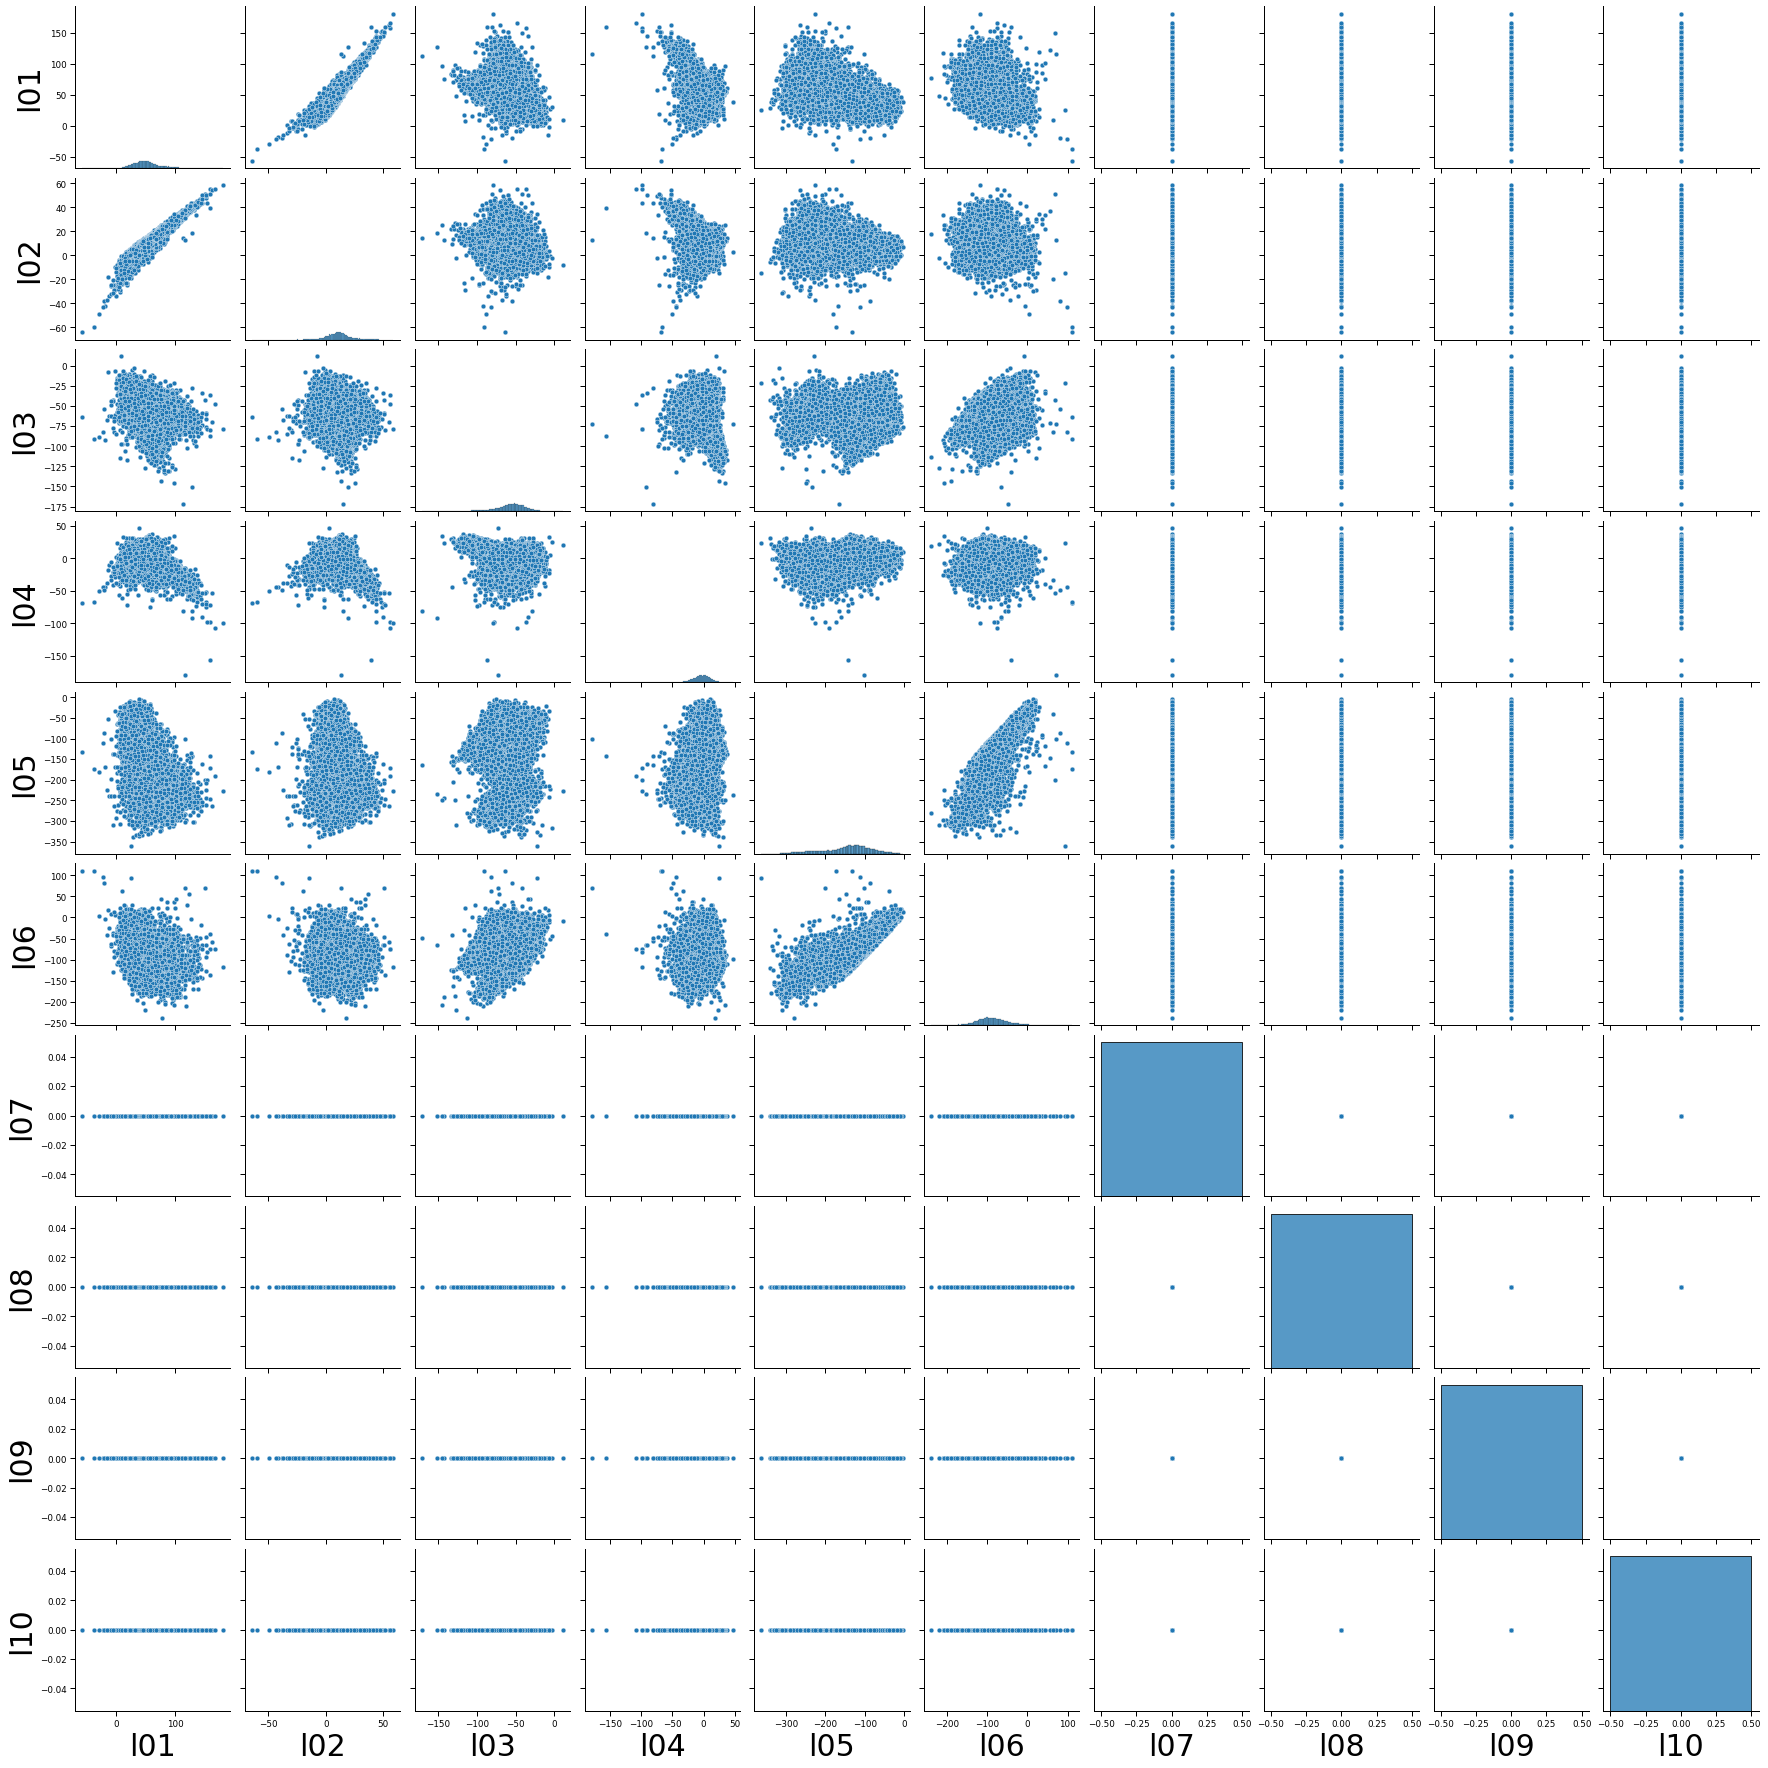


Background(hadron) events:

Eigendecomposition:

-Eigenvalues:
1: 58148.075697983455
2: 13686.709301067485
3: 5148.3300085698465
4: 1328.7457309065712
5: 170.2128755895769
6: 102.12214620091993
7: 35.533282565848616
8: 0.01637192357661493
9: 0.0005471781119559056
10: -3.4826430350812476e-13

-Eigenvectors:
1: [-0.26063371 -0.35683771 -0.43024788 -0.23358599 -0.20611567 -0.36922729
 -0.47893685 -0.08098467 -0.26084632 -0.2868257 ]
2: [-0.08992411 -0.26686644 -0.32351141  0.02429673 -0.20187635  0.83097976
  0.15770845  0.00581639 -0.2142498  -0.11556737]
3: [-0.42154933 -0.04645984 -0.19251239  0.46140556  0.04512896 -0.30162086
  0.61862777 -0.01310372 -0.01408192 -0.30675632]
4: [ 0.32397029 -0.38827658  0.27073782 -0.37391526  0.00276289 -0.08984501
  0.38574295 -0.5652515  -0.06468974 -0.22494787]
5: [-0.37791931 -0.45057298 -0.01236287 -0.40965175  0.1832753  -0.04970169
  0.23272572  0.29931183  0.23594187  0.50071557]
6: [ 0.38188723  0.22760333 -0.24014247 -0.40478258 -0.208740

<Figure size 2592x2592 with 0 Axes>

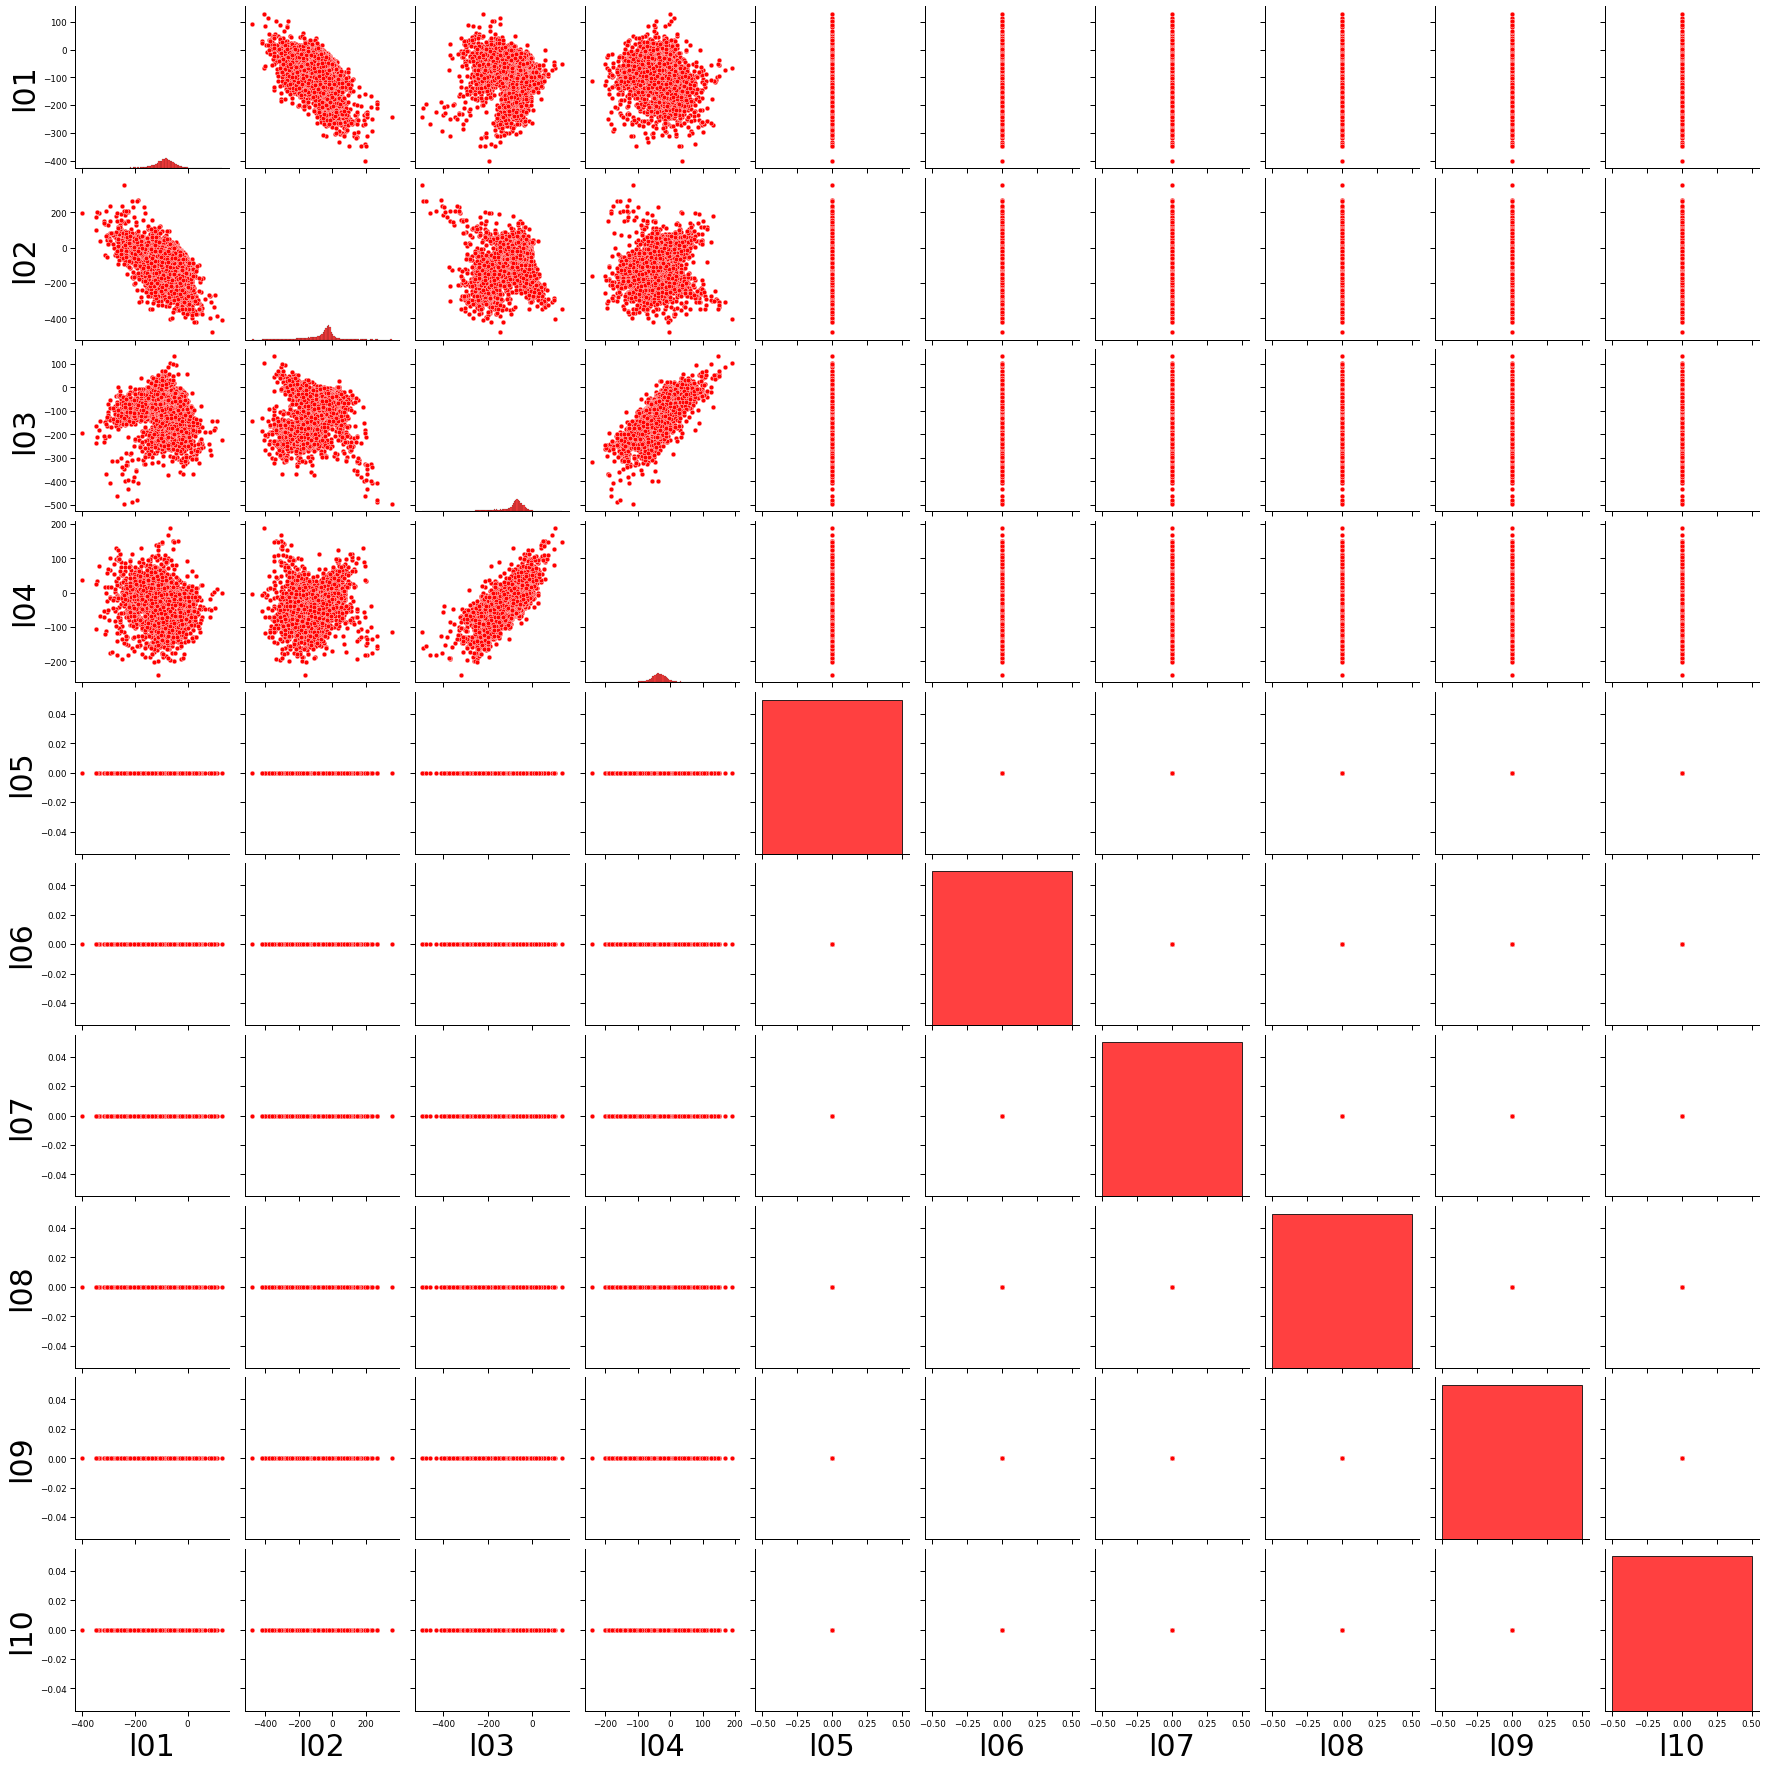

In [5]:
# Reading file and creating dataframe
columnindices = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
data = pd.read_csv("data8/magic04.data", header=None)
data.columns = columnindices
print(data, "\n")

# Splitting signal events from background events
signal = data[data["class"] == "g"].iloc[:,:10].T
bkg = data[data["class"] == "h"].iloc[:,:10].T

# Signal events analysis (same procedure as the first two exercises)
print("\nSignal(gamma) events:\n")

covm = np.cov(signal.iloc[:,:10].T)
dim = len(covm)

print("Eigendecomposition:\n")
l,V = la.eig(covm)
orderl = l.argsort()[::-1]
l = np.real_if_close(l)[orderl]
V = V[:, orderl]

print("-Eigenvalues:")
for i in range(dim):
    print(str(i+1) + ": " + str(l[i]))
print("\n-Eigenvectors:")
for i in range(dim):
    print(str(i+1) + ": " + str(V[:,i]))

print("\nSingle Value Decomposition:\n")
U, s, Vt = la.svd(covm)
orders = s.argsort()[::-1]
s = np.real_if_close(s)[orders]
U = U[:, orders]

print("-Eigenvalues:")
for i in range(dim):
    print(str(i+1) + ": " + str(s[i]))
print("\n-Eigenvectors:")
for i in range(dim):
    print(str(i+1) + ": " + str(U[:,i]))

print("\nAre the eigenvectors calculated with the methods coincident? ", np.allclose(abs(V), abs(U)), "\n")

Lambda = np.diag(l)
print("Diagonalised covariance matrix:\n", Lambda, "\n")
print("Comparison between traces of non-diagonal/diagonal covariant matrices:\n", covm.trace(), Lambda.trace())

print("\nPercentage of total variability retained considering the first k components:")
for k in range(len(l)):
    print(" k = " + str(len(l)-k) + ": " + str(100*np.diagonal(Lambda)[0:len(l)-k].sum()/Lambda.trace()) + "%")
print("Therefore I can choose k=6 and reduce the dimensionality of the system still retaining over 99% of the total variability.")
print("")

# Keeping 6 eigenvalues so setting the rejected eigenvectors to zero 
V = np.hstack([V[:,:6], np.zeros((dim, dim-6))])
signalr = np.dot(V.T, signal)

# storing data in dataframe to make a pairplot and see correlations between the eigenvalues
df = pd.DataFrame(signalr).T
df.columns = ["l01", "l02", "l03", "l04", "l05", "l06", "l07", "l08", "l09", "l10"]
print(df)

plt.figure(figsize=(36,36))
sns.set_context("paper", rc={"axes.labelsize":30})
sns.pairplot(df, vars=["l01", "l02", "l03", "l04", "l05", "l06", "l07", "l08", "l09", "l10"])
plt.show()

# Background events analysis
print("\nBackground(hadron) events:\n")

covmb = np.cov(bkg.iloc[:,:10].T)
dimb = len(covmb)

print("Eigendecomposition:\n")
lb,Vb = la.eig(covmb)
orderlb = lb.argsort()[::-1]
lb = np.real_if_close(lb)[orderlb]
Vb = Vb[:, orderlb]

print("-Eigenvalues:")
for i in range(dimb):
    print(str(i+1) + ": " + str(lb[i]))
print("\n-Eigenvectors:")
for i in range(dimb):
    print(str(i+1) + ": " + str(Vb[:,i]))

print("\nSingle Value Decomposition:\n")
Ub, sb, Vtb = la.svd(covmb)
ordersb = sb.argsort()[::-1]
sb = np.real_if_close(sb)[ordersb]
Ub = Ub[:, ordersb]

print("-Eigenvalues:")
for i in range(dimb):
    print(str(i+1) + ": " + str(sb[i]))
print("\n-Eigenvectors:")
for i in range(dimb):
    print(str(i+1) + ": " + str(Ub[:,i]))

print("\nAre the eigenvectors calculated with the methods coincident? ", np.allclose(abs(Vb), abs(Ub)), "\n")

Lambdab = np.diag(lb)
print("Diagonalised covariance matrix:\n", Lambdab, "\n")
print("Comparison between traces of non-diagonal/diagonal covariant matrices:\n", covmb.trace(), Lambdab.trace())

print("\nPercentage of total variability retained considering the first k components:")
for k in range(len(lb)):
    print(" k = " + str(len(lb)-k) + ": " + str(100*np.diagonal(Lambdab)[0:len(lb)-k].sum()/Lambdab.trace()) + "%")
print("Therefore I can choose k=4 and reduce the dimensionality of the system still retaining over 99% of the total variability.")
print("")

Vb = np.hstack([Vb[:,:4], np.zeros((dimb, dimb-4))])
bkgr = np.dot(Vb.T, bkg)
dfb = pd.DataFrame(bkgr).T
dfb.columns = ["l01", "l02", "l03", "l04", "l05", "l06", "l07", "l08", "l09", "l10"]
print(dfb)

plt.figure(figsize=(36,36))
sns.set_context("paper", rc={"axes.labelsize":30})
sns.pairplot(dfb, vars=["l01", "l02", "l03", "l04", "l05", "l06", "l07", "l08", "l09", "l10"], plot_kws={"color":"r"}, diag_kws={"color":"r"})
plt.show()